In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import linregress

In [ ]:
Voloume=10

In [21]:
file="test"
data=np.loadtxt(file)
time=[]
pressure=[]
for line in data:
    time.append(line[0])
    pressure.append(line[1])
time=np.array(time)
pressure=np.array(pressure)

In [25]:
linreg=linregress(time,pressure)
reg=lambda x: linreg.slope*x+linreg.intercept
reg_error=lambda x: linreg.stderr*x+linreg.intercept_stderr
print(f"Die Leckrate beträgt {linreg.slope}pm{linreg.stderr}")

LinregressResult(slope=0.09894285714285714, intercept=0.028095238095238173, rvalue=0.999325697849158, pvalue=6.818717889510245e-07, stderr=0.0018176758727099652, intercept_stderr=0.05503286999644793)


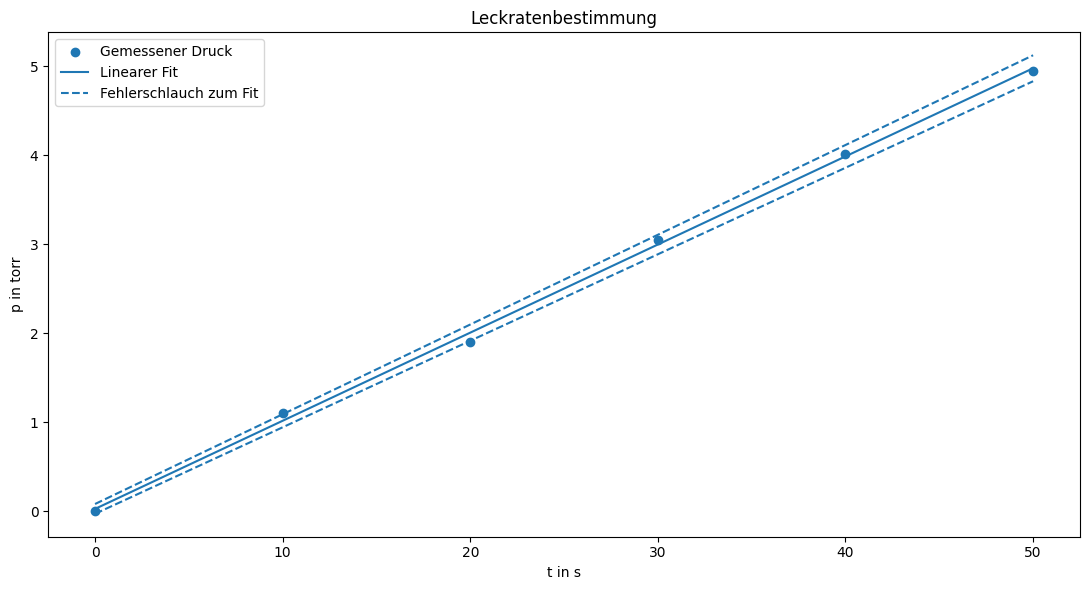

In [32]:
fig = plt.figure(figsize=(11, 6))
gs = GridSpec(8, 5)
fig1 = fig.add_subplot(gs[:, :])
fig1.set_title("Leckratenbestimmung")
fig1.set_ylabel("p in torr")
fig1.set_xlabel("t in s")
fig1.scatter(time,pressure,c="C0",label="Gemessener Druck")
fig1.plot(time,reg(time),c="C0",label="Linearer Fit")
fig1.plot(time,reg(time)+reg_error(time),c="C0",ls="--",label="Fehlerschlauch zum Fit")
fig1.plot(time,reg(time)-reg_error(time),c="C0",ls="--")
plt.tight_layout()
plt.legend()
plt.show()